In [2]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [3]:
# Your code here
incidents_df = pd.read_csv("https://raw.githubusercontent.com/DaoTonNu/cs329e-files/main/samp_data.csv")
#incidents_df = incidents_df[:2000]

In [4]:
print(incidents_df)

# Possible stuff:
'''
-distribution of issue types
-most common serious accident
-location analysis? its all austin though
-most common times for each type of issue, then times for all issues
-day of week with most accidents


'''

                                      Traffic Report ID  \
0     0911D8E4573BE6F3EEDA3F13927DE830F6A16E6D_15544...   
1     77BF3F680D135C03C5A0F017E13016D0A4785BB9_15679...   
2     CF9725A2055B246C88258A875D98584BA37189AF_16232...   
3     CA9E263D07340B8B04EEA95E4172CCB3800E773A_15621...   
4     83DF4360232F4B1CC609EDB0620E15005085786D_15127...   
...                                                 ...   
1995  F7BD9AC6946900FC1D9EF166B78449710E65900C_15181...   
1996  6F39DCFF36D707F13761851DCAD9E76EC53A9318_15712...   
1997  6ADB922FA7A3B56CFCBD0BEF18B3939C46CC213B_15720...   
1998  DD84F0EE24CFD17BA4AC744AFAD8DE1687C2A400_16516...   
1999  06072EB4F0454CBD924930E1FD2F06787E77D416_16204...   

                    Published Date     Issue Reported                Location  \
0     04/05/2019 04:40:10 PM +0000       Crash Urgent  (30.328916,-97.739788)   
1     09/09/2019 12:32:43 AM +0000     Traffic Hazard  (30.236542,-97.720985)   
2     06/09/2021 04:45:24 PM +0000  TRFC HAZD/ D

'\n-distribution of issue types\n-most common serious accident\n-location analysis? its all austin though\n-most common times for each type of issue, then times for all issues\n-day of week with most accidents\n\n\n'

Traffic Hazard                589
Crash Urgent                  514
Crash Service                 261
COLLISION                     201
TRFC HAZD/ DEBRIS             142
zSTALLED VEHICLE               64
LOOSE LIVESTOCK                53
COLLISION WITH INJURY          50
Traffic Impediment             40
COLLISN/ LVNG SCN              32
Stalled Vehicle                29
COLLISION/PRIVATE PROPERTY      7
BLOCKED DRIV/ HWY               5
VEHICLE FIRE                    5
TRAFFIC FATALITY                4
BOAT ACCIDENT                   2
ICY ROADWAY                     1
AUTO/ PED                       1
Name: Issue Reported, dtype: int64


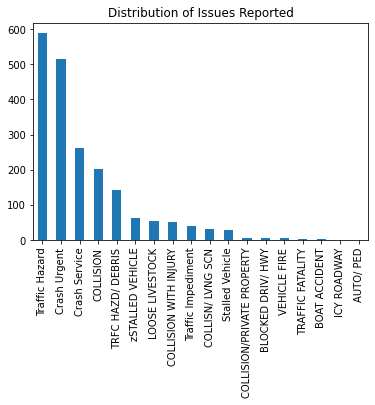

In [5]:
# Darren
series = incidents_df['Issue Reported'].value_counts()
print((series))
p1 = series.plot(kind='bar', title='Distribution of Issues Reported')

Text(0.5, 1.0, 'Incident Locations on Map')

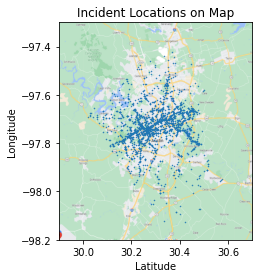

In [6]:
# Jared (I'm eventually going to try to get a better picture)
latitude = incidents_df['Latitude']
longitude = incidents_df['Longitude']
location = pd.concat([latitude, longitude], axis=1)
res = location.loc[location['Latitude'] > 25]

img = plt.imread('https://raw.githubusercontent.com/pomerantzj622/cs329e-project/main/map.PNG')
fig, ax = plt.subplots()
ax.imshow(img, extent=[29.9, 30.7, -98.2, -97.3])
ax.scatter(res['Latitude'], res['Longitude'], 1, marker='.')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Incident Locations on Map')

Fri    343
Tue    318
Mon    294
Thu    281
Wed    272
Sat    270
Sun    222
Name: DayofWeek, dtype: int64


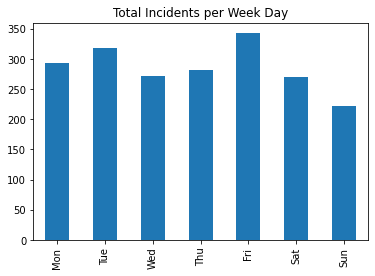

In [7]:
# Arturo
import datetime

# gets day of the week from data (Mon, ..., Sun)
def get_weekday(x):
    # remove time from entry
    date = x.split(" ")[0]
    
    # get month, day, year
    month, day, year = date.split("/")
    
    # week day number [0, ..., 6]. Monday is day 0
    day_n = datetime.datetime(int(year), int(month), int(day)).weekday()
    
    # return day of the week
    return ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"][day_n]



# get day of the week for each entry
day_of_week = pd.Series(incidents_df["Published Date"].apply(lambda x: get_weekday(x)), name = "DayofWeek")


# number of accidents per week day
print(day_of_week.value_counts())

order = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']
values = day_of_week.value_counts().loc[order]
plot = values.plot(kind='bar', title='Total Incidents per Week Day')

Mean hour of day: 13.6235


Text(0, 0.5, 'Frequency')

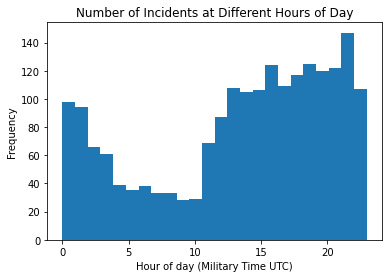

In [8]:
# Dao
def convert_milit_time(row):
  mtime = row[1]

  rtime_hms = row[1].split(':')

  if row[2] == 'PM':
    if int(rtime_hms[0]) != 12:
      mtime = str( int(rtime_hms[0]) + 12) + ':' + rtime_hms[1] + ':' + rtime_hms[2]
  else: #AM
    if int(rtime_hms[0]) == 12:
      mtime = str('00') + ':' + rtime_hms[1] + ':' + rtime_hms[2]

  return mtime

date_time = incidents_df['Published Date'].str.split()

milit_times = date_time.apply(lambda x: convert_milit_time(x))

milit_hms = pd.DataFrame(milit_times.str.split(':').values.tolist())

milit_hr = milit_hms[0].apply(lambda x: int(x))
milit_hr = pd.Series(milit_hr, name = 'UTC Hour of Day')
print('Mean hour of day:', milit_hr.mean())
plt.hist(milit_hr, 24)
plt.title('Number of Incidents at Different Hours of Day')
plt.xlabel('Hour of day (Military Time UTC)')
plt.ylabel('Frequency')

In [ ]:
def get_weekday(x):
    # remove time from entry
    date = x.split(" ")[0]
    
    # get month, day, year
    month, day, year = date.split("/")
    
    # week day number [0, ..., 6]. Monday is day 0
    day_n = datetime.datetime(int(year), int(month), int(day)).weekday()
    
    # return day of the week
    return day_n

# get day of the week for each entry
nday_of_week = pd.Series(incidents_df["Published Date"].apply(lambda x: get_weekday(x)), name = "DayofWeek")

weekday = nday_of_week.apply(lambda x: int(x < 5))

alg_df = pd.concat([milit_hr, incidents_df['Latitude'], 
                    incidents_df['Longitude']], ignore_index = True, axis = 1)
targ = weekday

from sklearn.model_selection import train_test_split
# splitting into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(alg_df, targ, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier
tree_clf = RandomForestClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = tree_clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.755
              precision    recall  f1-score   support

           0       0.36      0.15      0.21        88
           1       0.79      0.93      0.86       312

    accuracy                           0.76       400
   macro avg       0.58      0.54      0.53       400
weighted avg       0.70      0.76      0.71       400



In [ ]:
incidents_df.replace(['OBSTRUCT HWY', 'BLOCKED DRIV/ HWY', 'Traffic Impediment',
               'LOOSE LIVESTOCK', 'TRFC HAZD/ DEBRIS'], 'Traffic Hazard', inplace = True)
incidents_df.replace(['COLLISION WITH INJURY', 'COLLISN/ LVNG SCN', 
                      'COLLISION/PRIVATE PROPERTY'], 'COLLISION', inplace = True)

incidents_df = incidents_df[(incidents_df['Issue Reported'] == 'Traffic Hazard') | 
                            (incidents_df['Issue Reported'] == 'COLLISION')]

# get day of the week for each entry
nday_of_week = pd.Series(incidents_df["Published Date"].apply(lambda x: get_weekday(x)), name = "DayofWeek")

# CONCAT nday_of_week, milit_times, lat, and longit, once all have been fixed
date_time = incidents_df['Published Date'].str.split()
milit_times = date_time.apply(lambda x: convert_milit_time(x))
milit_hms = pd.DataFrame(milit_times.str.split(':').values.tolist())
milit_hr = milit_hms[0].apply(lambda x: int(x))
milit_hr = pd.Series(milit_hr, name = 'UTC Hour of Day')

milit_hr.index = nday_of_week.index
alg_df = pd.concat([nday_of_week, milit_hr, incidents_df['Latitude'], 
                    incidents_df['Longitude']], ignore_index = True, axis = 1)

targ = incidents_df['Issue Reported']

from sklearn.model_selection import train_test_split
# splitting into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(alg_df, targ, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = tree_clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.75
                precision    recall  f1-score   support

     COLLISION       0.52      0.57      0.54        58
Traffic Hazard       0.84      0.81      0.83       166

      accuracy                           0.75       224
     macro avg       0.68      0.69      0.68       224
  weighted avg       0.76      0.75      0.75       224



In [ ]:
# other considerations for calc IF HAVE TIME after main stuff


# predicting whether weekday or not, using location / time / maybe issue type?

#